<a href="https://colab.research.google.com/github/abdoulayegk/pytorch-practice/blob/main/pytorch_heart_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# set default figure size
plt.rcParams['figure.figsize'] = (15, 7.0)

In [2]:
heart_data = 'https://raw.githubusercontent.com/abdoulayegk/pytorch-practice/main/heart.csv'

heart_df = pd.read_csv(heart_data)

heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# describe the data
heart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [5]:
# checking data types
heart_df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [6]:
# drop duplicates if any
heart_df.drop_duplicates()

# check missing valus
heart_df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Text(0.5, 1.0, 'output Column Distribution')

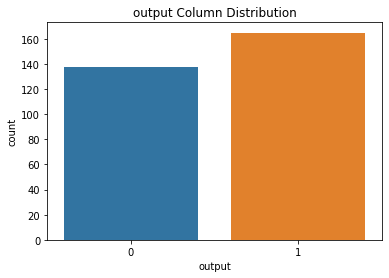

In [7]:
# check output column class distribution
sns.countplot(x='output', data=heart_df).set_title("output Column Distribution")

Text(0.5, 1.0, 'Sex Column Distribution')

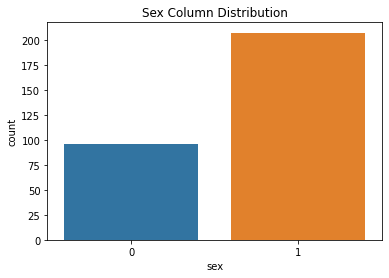

In [8]:
# check sex column class distribution
sns.countplot(x='sex', data=heart_df).set_title("Sex Column Distribution")

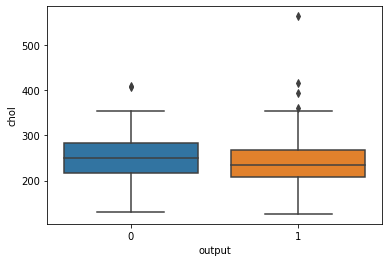

In [9]:
# box plot for output and cholestrol level
sns.boxplot(x="output",y="chol",data=heart_df)

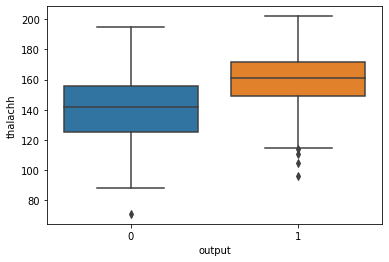

In [10]:
# box plot for output and cholestrol level
sns.boxplot(x="output",y="thalachh",data=heart_df)

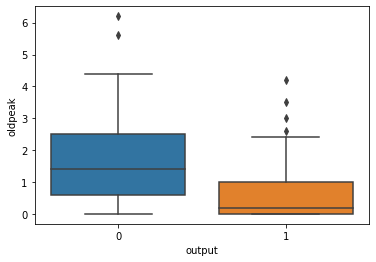

In [11]:
# box plot for output and cholestrol level
sns.boxplot(x="output",y="oldpeak",data=heart_df)

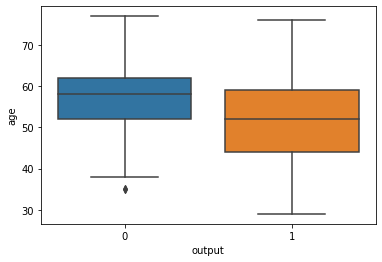

In [12]:
# box plot for output and cholestrol level
sns.boxplot(x="output",y="age",data=heart_df)

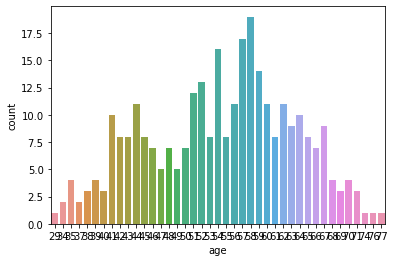

In [13]:
ax = sns.countplot(x='age', data=heart_df)

Text(0.5, 1.0, 'Columns Correlation')

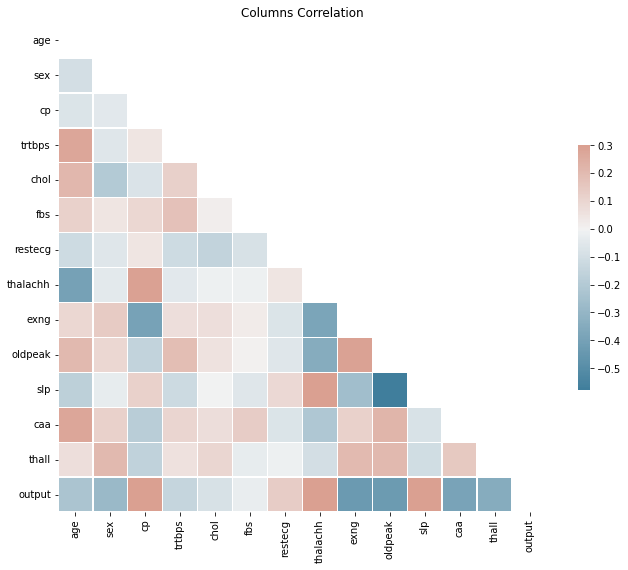

In [14]:
# check correlation
corr = heart_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title("Columns Correlation")

In [15]:
# split data for training
y = heart_df.output.to_numpy()
X = heart_df.drop('output', axis=1).to_numpy()

# scale X values
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split data while keeping output class distribution consistent
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [28]:
# convert data to pytorch tensors
def df_to_tensor(df):
    return torch.from_numpy(df).float()

X_traint = df_to_tensor(X_train)
y_traint = df_to_tensor(y_train)
X_testt = df_to_tensor(X_test)
y_testt = df_to_tensor(y_test)

In [29]:
# create pytorch dataset
train_ds = TensorDataset(X_traint, y_traint)
test_ds = TensorDataset(X_testt, y_testt)

# create data loaders
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
test_dl = DataLoader(test_ds, batch_size, shuffle=False)

In [30]:
# model architecture
class BinaryNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.l1 = nn.Linear(input_size, 64)
        self.l2 = nn.Linear(64, 32)
        self.l3 = nn.Linear(32, 16)
        self.out = nn.Linear(16, output_size)
        
    def forward(self, x):
        x = self.l1(x)
        x = F.relu(x)
        x = self.l2(x)
        x = F.relu(x)
        x = self.l3(x)
        x = F.relu(x)
        x = self.out(x)
        return torch.sigmoid(x) # scaling values between 0 and 1

In [31]:
X.shape[1]

13

In [32]:
input_size = X.shape[1] # number of features which is 13
output_size = 1
model = BinaryNetwork(input_size, output_size)
loss_fn = nn.BCELoss() # Binary Cross Entropy
optim = torch.optim.Adam(model.parameters(), lr=1e-3)
model

BinaryNetwork(
  (l1): Linear(in_features=13, out_features=64, bias=True)
  (l2): Linear(in_features=64, out_features=32, bias=True)
  (l3): Linear(in_features=32, out_features=16, bias=True)
  (out): Linear(in_features=16, out_features=1, bias=True)
)

In [33]:
epochs = 500
losses = []
for i in range(epochs):
    epoch_loss = 0
    for feat, target in train_dl:
        optim.zero_grad()
        out = model(feat)
        loss = loss_fn(out, target.unsqueeze(1))
        epoch_loss += loss.item()
        loss.backward()
        optim.step()
    losses.append(epoch_loss)
    # print loss every 10 
    if i % 10 == 0:
        print(f"Epoch: {i}/{epochs}, Loss = {loss:.5f}")

Epoch: 0/500, Loss = 0.69050
Epoch: 10/500, Loss = 0.06942
Epoch: 20/500, Loss = 0.07784
Epoch: 30/500, Loss = 0.00350
Epoch: 40/500, Loss = 0.02688
Epoch: 50/500, Loss = 0.00078
Epoch: 60/500, Loss = 0.00002
Epoch: 70/500, Loss = 0.00017
Epoch: 80/500, Loss = 0.00105
Epoch: 90/500, Loss = 0.00009
Epoch: 100/500, Loss = 0.00009
Epoch: 110/500, Loss = 0.00002
Epoch: 120/500, Loss = 0.00002
Epoch: 130/500, Loss = 0.00000
Epoch: 140/500, Loss = 0.00000
Epoch: 150/500, Loss = 0.00000
Epoch: 160/500, Loss = 0.00000
Epoch: 170/500, Loss = 0.00000
Epoch: 180/500, Loss = 0.00000
Epoch: 190/500, Loss = 0.00002
Epoch: 200/500, Loss = 0.00000
Epoch: 210/500, Loss = 0.00002
Epoch: 220/500, Loss = 0.00000
Epoch: 230/500, Loss = 0.00000
Epoch: 240/500, Loss = 0.00000
Epoch: 250/500, Loss = 0.00000
Epoch: 260/500, Loss = 0.00000
Epoch: 270/500, Loss = 0.00000
Epoch: 280/500, Loss = 0.00000
Epoch: 290/500, Loss = 0.00000
Epoch: 300/500, Loss = 0.00000
Epoch: 310/500, Loss = 0.00000
Epoch: 320/500, Los

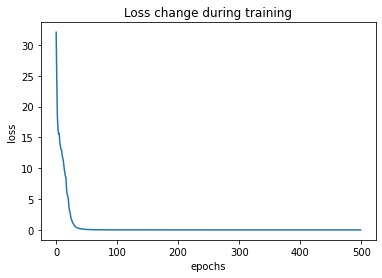

In [34]:
# plot losses
graph = sns.lineplot(x=[x for x in range(0, epochs)], y=losses)
graph.set(title="Loss change during training", xlabel='epochs', ylabel='loss')
plt.show()

In [35]:
# evaluate the model
y_pred_list = []
model.eval()
with torch.no_grad():
    for X, y in test_dl:
        y_test_pred = model(X)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag)

# convert predictions to a list of tensors with 1 dimention
y_pred_list = [a.squeeze() for a in y_pred_list]

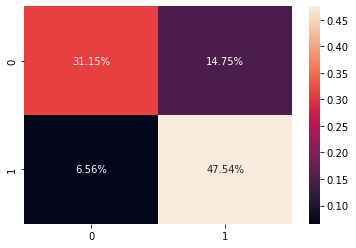

In [36]:
# check confusion matrix (hstack will merge all tensor lists into one list)
cfm = confusion_matrix(y_test, torch.hstack(y_pred_list))
sns.heatmap(cfm / np.sum(cfm), annot=True, fmt='.2%')

In [37]:
# print metrics
print(classification_report(y_test, torch.hstack(y_pred_list)))

              precision    recall  f1-score   support

           0       0.83      0.68      0.75        28
           1       0.76      0.88      0.82        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.78        61

